<a href="https://colab.research.google.com/github/thaohh69/Python-Statistics-Practice/blob/master/gmail_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python statistics - Analyzing Gmail

Standard imports

In [0]:
import numpy as np
import scipy.stats
import pandas as pd

In [0]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [0]:
import re
import mailbox
import csv

### How I converted my mailbox.

In [18]:
mbox = mailbox.mbox('Sent.mbox')


The resulting object is array-like, with one entry per message. Each entry is dictionary like, with keys corresponding to metadata and data for each message.

In [15]:
mbox[0].keys()

[]

The easiest way to get these data into Pandas is to build a CSV file from them. We use the module `csv` to write out the CSV file as we loop over the mailbox object. We save only subject, from, to, and date, and we write a simple header at the top with the names of columns.

In [0]:
with open('mbox.csv', 'w') as outfile:
  writer = csv.writer(outfile)
  writer.writerow(['subject', 'from', 'to', 'date'])

  for message in mbox:
    writer.writerow(message['subject'], message['from'], message['to'], message['date'])

## Moving on!

In [17]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
messages = pd.read_csv('gdrive/My Drive/Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_08/mbox-anonymized.csv')


In [22]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 4 columns):
subject    1030 non-null object
from       1029 non-null object
to         1030 non-null object
date       1030 non-null object
dtypes: object(4)
memory usage: 32.3+ KB


In [23]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>","Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...","Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>","Tue, 31 Oct 2017 00:13:00 +0000"


In [24]:
messages['from'][0]

'"Vallisneri, Michele (335S)" <Michele.Vallisneri@jpl.nasa.gov>'

In [25]:
re.search('<(.+)>',messages['from'][0])

<_sre.SRE_Match object; span=(29, 62), match='<Michele.Vallisneri@jpl.nasa.gov>'>

In [26]:
re.search('<(.+)>',messages['from'][0]).group(0)

'<Michele.Vallisneri@jpl.nasa.gov>'

In [27]:
re.search('<(.+)>',messages['from'][0]).group(1)

'Michele.Vallisneri@jpl.nasa.gov'

In [28]:
re.search('<(.+)>','Michele.Vallisneri@jpl.nasa.gov').group(1)

AttributeError: ignored

In [0]:
def clean_address(raw):
    match = re.search('<(.+)>',raw)
    
    if match is None:
        return raw
    else:
        return match.group(1)

In [34]:
clean_address(messages['from'][0])

'Michele.Vallisneri@jpl.nasa.gov'

In [35]:
messages['from'] = messages['from'].apply(clean_address)

TypeError: ignored

In [36]:
%debug

> /usr/lib/python3.6/re.py(182)search()
    180     """Scan through string looking for a match to the pattern, returning
    181     a match object, or None if no match was found."""
--> 182     return _compile(pattern, flags).search(string)
    183 
    184 def sub(pattern, repl, string, count=0, flags=0):

ipdb> up
> <ipython-input-33-90e4d68109af>(2)clean_address()
      1 def clean_address(raw):
----> 2     match = re.search('<(.+)>',raw)
      3 
      4     if match is None:
      5         return raw

ipdb> print(raw)
nan
ipdb> quit


In [0]:
messages['from'] = messages['from'].dropna().apply(clean_address)
messages['to'] = messages['to'].dropna().apply(clean_address)

In [38]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,"Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,"Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,"Tue, 31 Oct 2017 00:13:00 +0000"


In [41]:
messages['date'][0]

'Mon, 27 Nov 2017 14:18:46 -0800'

In [44]:
pd.to_datetime(messages['date'][0]).tz_convert('America/Los_Angeles')

Timestamp('2017-11-27 14:18:46-0800', tz='America/Los_Angeles')

In [0]:
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_convert('America/Los_Angeles'))

In [46]:
messages.date.head()

0   2017-11-27 14:18:46-08:00
1   2018-03-26 18:38:16-07:00
2   2018-02-13 14:54:50-08:00
3   2018-01-26 11:40:04-08:00
4   2017-10-30 17:13:00-07:00
Name: date, dtype: datetime64[ns, America/Los_Angeles]

In [47]:
messages.date.min(), messages.date.max()

(Timestamp('2017-06-30 23:26:52-0700', tz='America/Los_Angeles'),
 Timestamp('2018-05-13 08:40:20-0700', tz='America/Los_Angeles'))

In [48]:
messages.date.dt.weekday_name.head()

0     Monday
1     Monday
2    Tuesday
3     Friday
4     Monday
Name: date, dtype: object

In [0]:
messages['dayofweek'] = pd.Categorical(messages['date'].dt.weekday_name,
                                       ordered=True,
                                       categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [52]:
messages.head()

,subject,from,to,date,dayofweek
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,2017-11-27 14:18:46-08:00,Monday
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,2018-03-26 18:38:16-07:00,Monday
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,2018-02-13 14:54:50-08:00,Tuesday
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,2018-01-26 11:40:04-08:00,Friday
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,2017-10-30 17:13:00-07:00,Monday


In [0]:
messages['timeofday'] = messages['date'].dt.hour + messages['date'].dt.minute / 60

In [0]:
messages['nyear'] = messages['date'].dt.year + messages['date'].dt.dayofyear/365.25 + messages['timeofday']/24/365.25 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


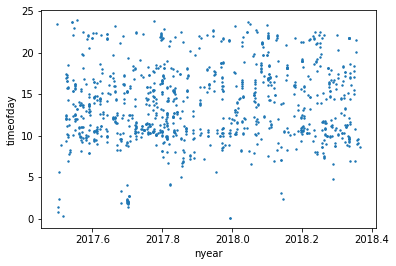

In [59]:
messages.plot.scatter('nyear','timeofday',s=2)

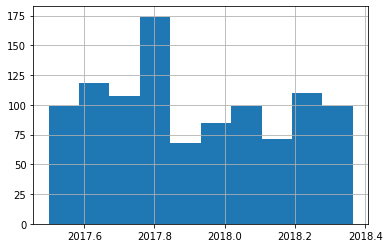

In [62]:
messages.nyear.hist()

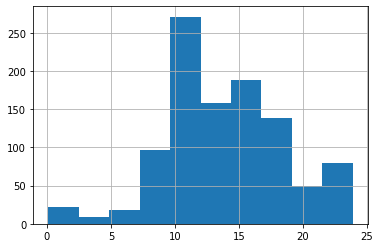

In [63]:
messages.timeofday.hist()

In [64]:
messages.dayofweek.value_counts()

Monday       222
Tuesday      220
Wednesday    211
Thursday     172
Friday       140
Sunday        33
Saturday      32
Name: dayofweek, dtype: int64

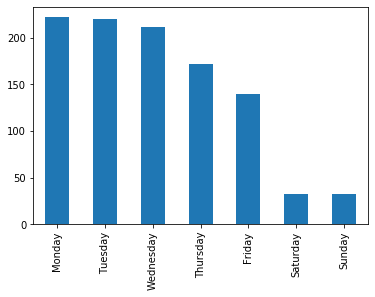

In [65]:
counts = messages.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [0]:
days = messages.dayofweek.cat.categories

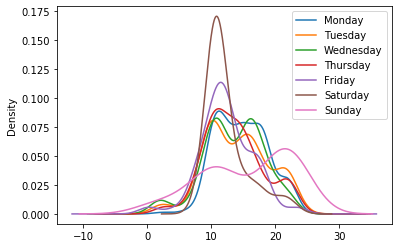

In [70]:
#for day in days: 
#  messages[messages.dayofweek==day].timeofday.plot(kind='density')

#pp.legend(days)

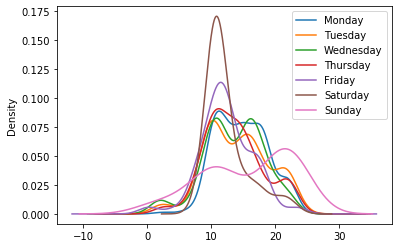

In [73]:
messages.groupby('dayofweek').timeofday.plot(kind='density')
pp.legend(days)